## Initialisation

### Dependencies

#### Third party

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

#### Personal notebook

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 0.01
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 460
Young's Modulus: 20.86712984387514 GPa
Yield Strength: 476.245126 MPa
Ultimate Tensile Strength is 524.425548 MPa at 31.816329999999997% elongation.


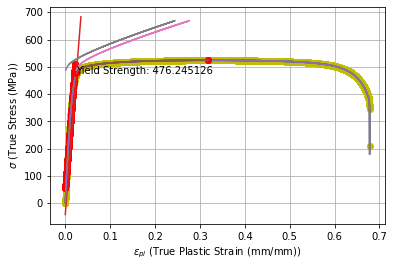

In [3]:
import ipynb

from ipynb.fs.defs.utilities import (
    differentiate,
)
from ipynb.fs.full.true_strain_stress import (
    true_plastic_strain,
    true_stress,
    true_strain,
)
from ipynb.fs.full.engineering_strain_stress import (
    yield_strength,
)

### Notations

- $\sigma \rightarrow$ True Stress
- $\epsilon \rightarrow$ True Strain
- $\epsilon_{pl} \rightarrow$ True Plastic Strain
- $\sigma_{ys} \rightarrow$ Yield Strength
- $\sigma_{uts} \rightarrow$ Ultimate Tensile Strength
- $n \rightarrow$ Work hardening Exponent
- $E \rightarrow$ Young's Modulus
- $K \rightarrow$ Strength Coefficient
- $e \rightarrow$ Engineering Strain
- $s \rightarrow$ Engineering Stress
- $\theta \rightarrow$ Work hardening rate
- $\sigma - \sigma_{ys} \rightarrow$ Flow Stress

## Hollomon Equation

$ \sigma = K \cdot \epsilon^n \Rightarrow $ 
$ \frac{d\sigma}{d\epsilon} = K \cdot n \epsilon^{n-1} \Rightarrow$
$ \frac{d\sigma}{d\epsilon} = n \cdot \frac{\sigma}{\epsilon}$

## Plot of $\frac{d\sigma}{d\epsilon}$ v/s $\epsilon$

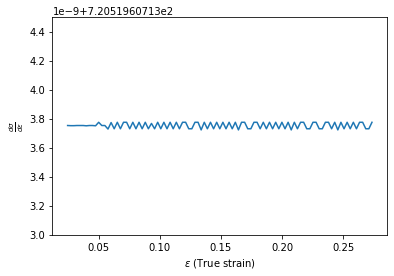

In [14]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

true_stress_smooth = smooth(true_stress,1)
# _ = plt.plot (true_strain, true_stress_smooth, 'bo')
# _ = plt.plot(true_strain, true_stress, color = 'yellow')

# Sir asked us to consider these number of points
consider = 100

reduced_true_strain = np.linspace(min(true_strain),max(true_strain),consider)
reduced_true_stress = np.linspace(min(true_stress),max(true_stress),consider)

d_sigma_epsilon = differentiate(reduced_true_strain, reduced_true_stress)

_ = plt.plot(reduced_true_strain[:consider-1], d_sigma_epsilon)
_ = plt.xlabel('$\epsilon$ (True strain)')
_ = plt.ylabel('$\\frac{d\sigma}{d\epsilon}$')

## Plot of $\frac{d\sigma}{d\epsilon}$ v/s $\frac{\sigma}{\epsilon}$

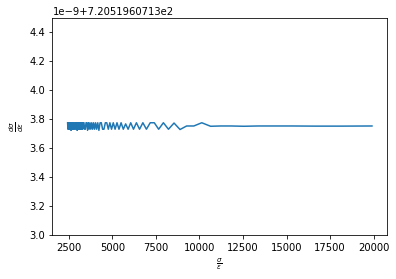

In [43]:
sigma_epsilon = np.true_divide(reduced_true_stress, reduced_true_strain)
_ = plt.plot(sigma_epsilon[:consider-1], d_sigma_epsilon)
_ = plt.xlabel('$\\frac{\sigma}{\epsilon}$')
_ = plt.ylabel('$\\frac{d\sigma}{d\epsilon}$')

### Computing work hardening exponent

It can be guessed simply dividing each $\frac{d\sigma}{d\epsilon}$ by $\frac{\sigma}{\epsilon}$ and taking the mean

In [53]:
guess_work_hard_exp = sum(np.true_divide(d_sigma_epsilon,sigma_epsilon[:consider-1]))/len(d_sigma_epsilon)
print(f'Guessed work hardening exponent for further prediciton: {guess_work_hard_exp}')

Guessed work hardening exponent for further prediciton: 0.17918463155979503


In [119]:
def theoretical_equation(n, sigma_epsilon):
    return n*sigma_epsilon

max_limit = max(np.true_divide(d_sigma_epsilon,sigma_epsilon[:consider-1]))
min_limit = min(np.true_divide(d_sigma_epsilon,sigma_epsilon[:consider-1]))
tolerance = 0.1

min_squared = 1e10

d = {}

def compute_n(max_limit, min_limit, min_squared):
    temp_n = (max_limit+min_limit)/2
    min_squared_temp = 0
    for i in range(len(d_sigma_epsilon)):
        theoretical_value = theoretical_equation(temp_n, sigma_epsilon[i])
        min_squared_temp += abs(theoretical_value - d_sigma_epsilon[i])
    diff = abs(min_squared - min_squared_temp)
    
    if diff < tolerance:
        d[diff] = temp_n
        return (diff, temp_n)
    else:
        min_squared = min_squared_temp
        if d.get(diff) is None:
            return min(compute_n(max_limit, temp_n, min_squared), compute_n(temp_n, min_limit, min_squared))
        else:
            return (diff, d[diff])
            
compute_n(max_limit, min_limit, min_squared)

(0.04677564465237083, 0.14531340470884077)

## Plot of $\frac{d\sigma}{d\epsilon}$ v/s $\sigma - \sigma_{ys}$

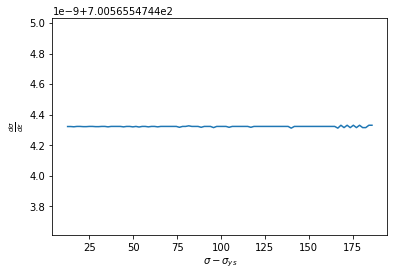

In [35]:
reduced_true_stress_ys = np.linspace(min(true_stress_smooth)-yield_strength,max(true_stress_smooth)-yield_strength,100)

d_sigma_epsilon = differentiate(reduced_true_strain, reduced_true_stress_ys)

_ = plt.plot(reduced_true_stress_ys[:99], d_sigma_epsilon)
_ = plt.xlabel('$\sigma - \sigma_{ys}$')
_ = plt.ylabel('$\\frac{d\sigma}{d\epsilon}$')